In [1]:
from SliceNet import SliceNet
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import random
import math

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

W0423 01:43:23.577135 140520593090304 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


1.13.1


Using TensorFlow backend.


importing hub
Instructions for updating:
Colocations handled automatically by placer.


W0423 01:43:25.084817 140520593090304 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/control_flow_ops.py:3632: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


In [2]:
weights_path = '/home/bmmidei/SliceCast/models/04_20_2019_2300_final.h5'

net = SliceNet(classification=True, pretrain=True, weights_path=weights_path)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0423 01:44:00.867871 140520593090304 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0423 01:44:02.198460 140520593090304 saver.py:1483] Saver not created because there are no variables in the graph to restore


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


W0423 01:44:03.286976 140520593090304 deprecation.py:506] From /home/bmmidei/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
dataPath = Path('/home/bmmidei/SliceCast/data/podcasts/hdf5_noIntro')
files = [str(x) for x in dataPath.glob('**/*') if x.suffix=='.hdf5']

val_prop = 0.25
mask = random.sample(range(0,len(files)), math.floor(val_prop*len(files)))

# randomly assign some files to validation and the rest to train
train_files = [x for (i,x) in enumerate(files) if i not in mask]
val_files = [x for (i,x) in enumerate(files) if i in mask]

In [8]:
history, pkscores = net.train(train_files=train_files,
                        val_files=val_files,
                        batch_size=4, 
                        epochs=10,
                        steps_per_epoch=10,
                        maxlen=None,
                        save=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoderIn (InputLayer)       (None, None)              0         
_________________________________________________________________
encoderOut (Lambda)          (None, None, 512)         0         
_________________________________________________________________
lstm_1 (Bidirectional)       (None, None, 512)         1574912   
_________________________________________________________________
lstm_2 (Bidirectional)       (None, None, 512)         1574912   
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 512)         0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 256)         131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 256)         0         
__________

In [9]:
pkscores.on_train_end()

[0.3635164785643556,
 0.345133065868177,
 0.33237018230197196,
 0.3259276655112923,
 0.33355379225285625,
 0.3191059558133643,
 0.2762732013303988,
 0.3025143206038755,
 0.27613157124753623,
 0.25337749698671036]

# Visualizing Results

## Loss and Accuracy during training

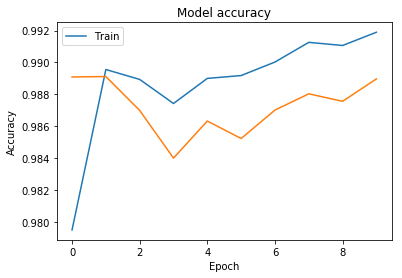

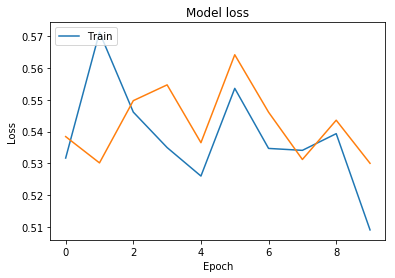

In [10]:
# Plot training & validation accuracy values
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()